In [7]:
#!pip install neurolab
#!pip install minisom
#!pip install neupy 
import neurolab as nl
from neupy.algorithms import SOFM, LVQ
import numpy as np
from minisom import MiniSom
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

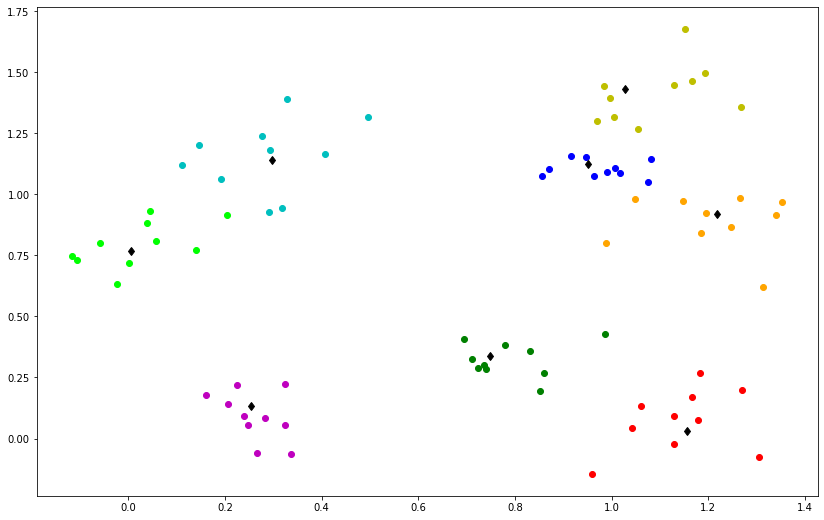

In [3]:
clusters_num = 8
plt.figure(figsize=(14, 9))
clrs = ['r', 'b', 'g', 'c', 'm', 'y', 'lime', 'orange'] 
X, y, centrs = make_blobs(n_samples=80, cluster_std=0.1, centers=clusters_num, n_features=2, center_box=(0, 1.5), return_centers=True,random_state=10)
for i in range(8):
  plt.scatter(X[y==i,0],X[y==i,1],color=clrs[i])
plt.plot(centrs[:,0], centrs[:, 1], 'dk')

plt.show()

Слой Кохонена

Epoch: 50; Error: 17.372435782506955;
Epoch: 100; Error: 13.618170135082073;
Epoch: 150; Error: 12.643383350272668;
Epoch: 200; Error: 12.49778269942852;
Epoch: 250; Error: 12.471369461406988;
The maximum number of train epochs is reached


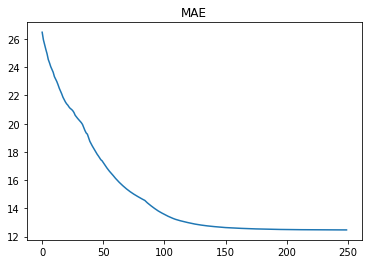

In [18]:
clusters = 8
net = nl.net.newc([[0.0, 1.4],[0.0, 1.75]], clusters)
error = net.train(X, epochs=250, show=50)
plt.plot(error)
plt.title('MAE')
plt.show()

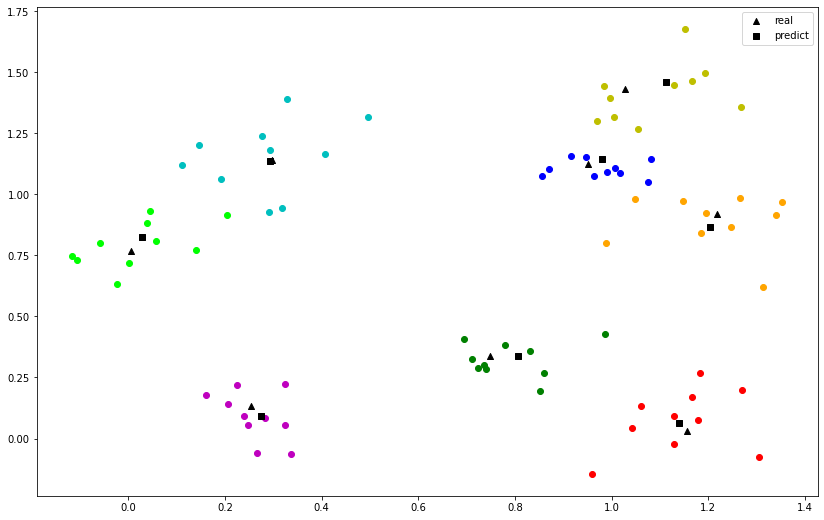

In [19]:
pred_cntrs = net.layers[0].np['w']
plt.figure(figsize=(14, 9))
for i in range(8):
  plt.scatter(X[y==i,0],X[y==i,1],c=clrs[i])
plt.scatter(centrs[:,0], centrs[:, 1], c = 'black', marker='^', label="real")
plt.scatter(pred_cntrs[:,0], pred_cntrs[:, 1], c = 'black',marker='s', label="predict")
plt.legend()
plt.show()

сгенерируем 5 точек и определим их класс

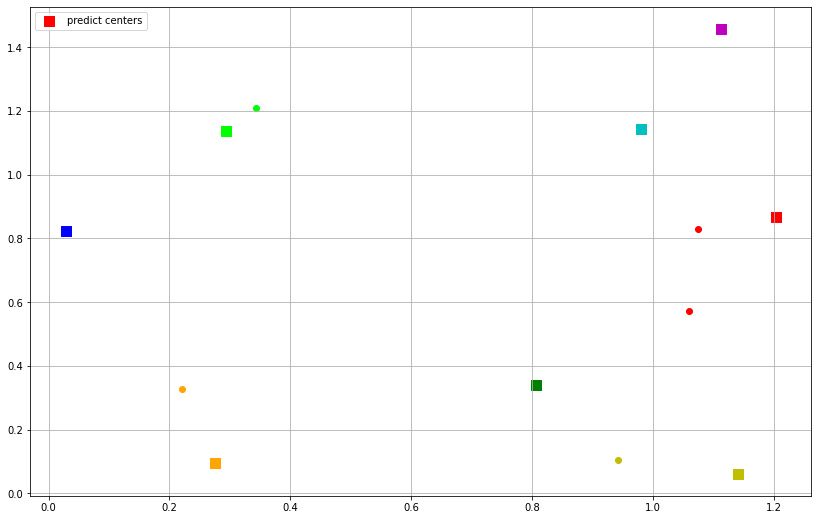

In [21]:
X_test = np.array([[np.random.uniform(0, 1.5), np.random.uniform(0, 1.5)] for _ in range(5)])
pred = np.argmax(net.sim(X_test), axis=1)
plt.figure(figsize=(14, 9))

plt.scatter(pred_cntrs[:,0], pred_cntrs[:, 1], s = 100, c = clrs, marker='s', label="predict centers")
for i in range(8):
  plt.scatter(X_test[pred==i,0],X_test[pred==i,1],c=clrs[i])
plt.legend()
plt.grid(True)
plt.show()

Карта Кохонена

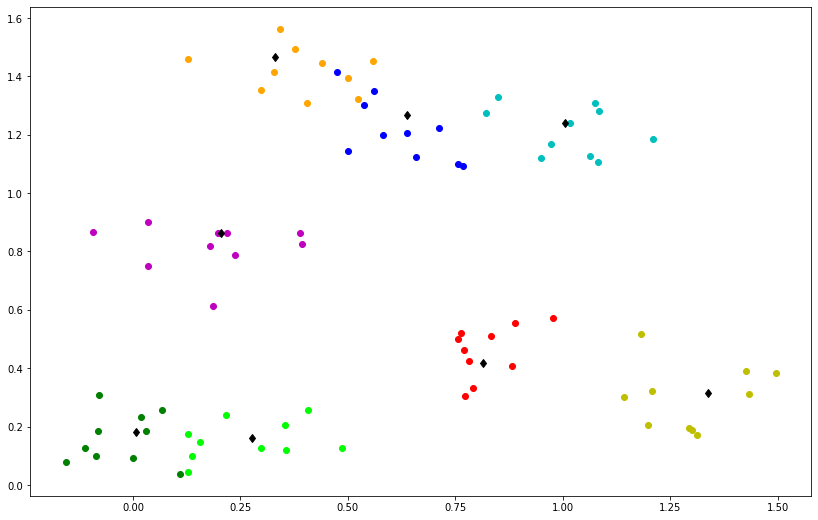

In [22]:
clusters_num = 8
plt.figure(figsize=(14, 9))
clrs = ['r', 'b', 'g', 'c', 'm', 'y', 'lime', 'orange'] 
X, y, centrs = make_blobs(n_samples=80, cluster_std=0.1, centers=clusters_num, n_features=2, center_box=(0, 1.5), return_centers=True,random_state=100)
for i in range(8):
  plt.scatter(X[y==i,0],X[y==i,1],color=clrs[i])
plt.plot(centrs[:,0], centrs[:, 1], 'dk')

plt.show()

In [23]:
som = MiniSom(2, 4, X.shape[1], sigma=0.9, learning_rate=0.7,topology='hexagonal', random_seed=10)
err = som.train(X, 150, verbose=True)

 [ 150 / 150 ] 100% - 0:00:00 left 
 quantization error: 0.1269847556306936


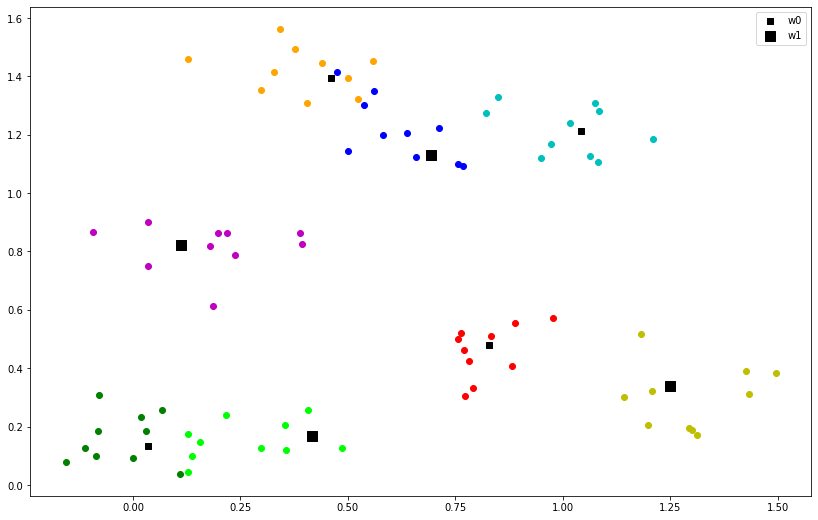

In [24]:
pred_cntrs = som.get_weights()
plt.figure(figsize=(14, 9))
for i in range(8):
  plt.scatter(X[y==i,0],X[y==i,1],c=clrs[i])

for i  in range(len(pred_cntrs)):
   plt.scatter(pred_cntrs[i][:,0], pred_cntrs[i][:, 1], s = 40+i*80, c = 'black',marker='s', label = "w"+str(i))
plt.legend()
plt.show()

сгенерируем 5 точек и определим их класс

[1 1 5 6 7]


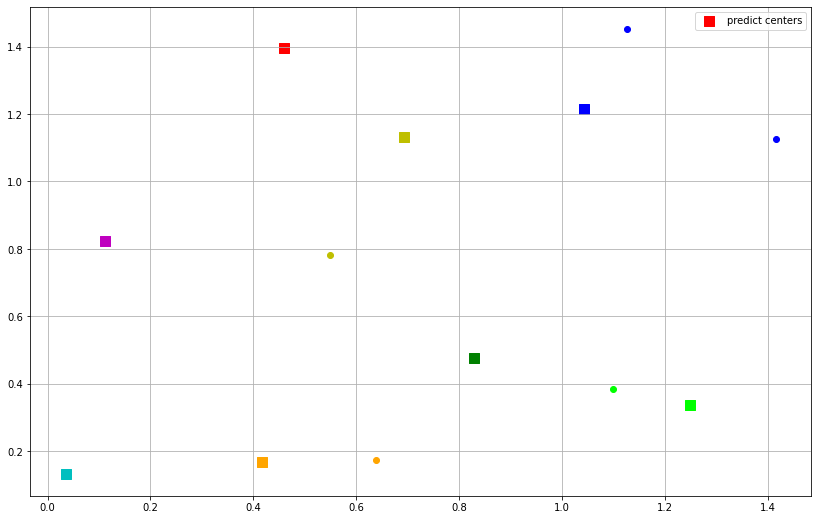

In [38]:
X_test = np.array([[np.random.uniform(0, 1.5), np.random.uniform(0, 1.5)] for _ in range(5)])
plt.figure(figsize=(14, 9))

pred_cnts = np.reshape(pred_cntrs,(8,2))
plt.scatter(pred_cnts[:,0], pred_cnts[:, 1], s = 100, c = clrs, marker='s', label="predict centers")

winner_coordinates = np.array([som.winner(x) for x in X_test]).T
cluster_index = np.ravel_multi_index(winner_coordinates, (2,4))
print(cluster_index)
for c in np.unique(cluster_index):
    plt.scatter(X_test[cluster_index == c, 0],X_test[cluster_index == c, 1], c=clrs[c])

plt.grid(True)
plt.legend()
plt.show()

Карта Кохонена для задачи коммивояжера

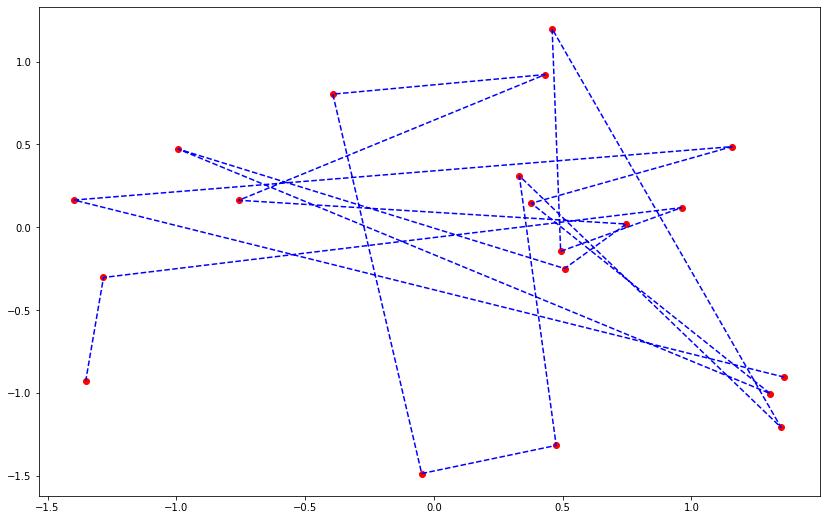

In [78]:
z = np.array([[np.random.uniform(-1.5, 1.5), np.random.uniform(-1.5, 1.5)] for _ in range(20)])
plt.figure(figsize=(14, 9))

plt.plot(z[:, 0], z[:, 1], '--', c='b')
plt.scatter(z[:, 0], z[:, 1], c='red');

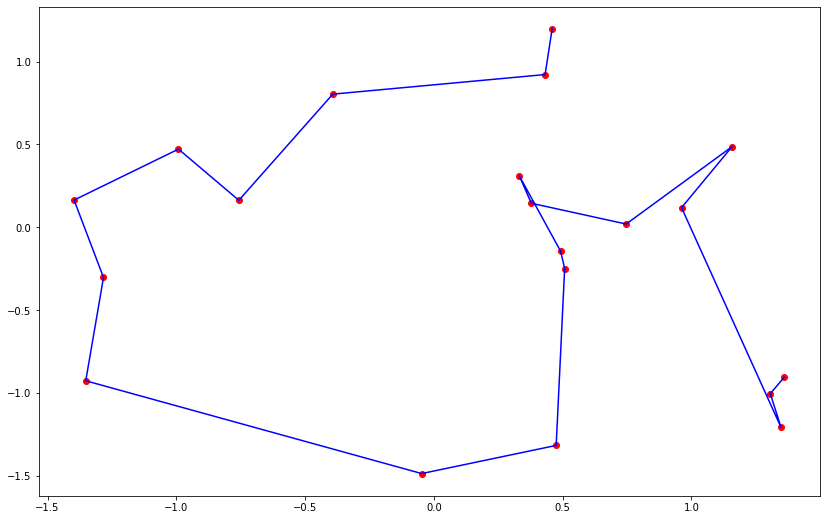

Error: 0.02490682028214043


In [96]:
som = MiniSom(1, 20, z.shape[1], sigma=0.9, random_seed=1)
som.random_weights_init(z)

plt.figure(figsize=(14, 9))
for _ in (range(6)):
    som.train(z, 500, verbose=False)

plt.scatter(z[:, 0], z[:, 1], c='red')
visit_order = np.argsort([som.winner(p)[1] for p in z])
plt.plot(z[visit_order][:,0], z[visit_order][:,1], c='b')
plt.show()
print('Error: {}'.format(som.quantization_error(z)))


LVQ-сеть

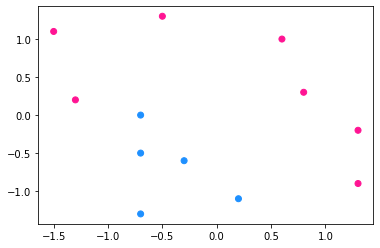

In [113]:
points = np.array([
    [-0.7, -1.5, -0.3, 1.3, -0.7, 0.2, -1.3, -0.7, 0.6, -0.5, 1.3, 0.8],
    [0, 1.1, -0.6, -0.2, -1.3, -1.1, 0.2, -0.5, 1, 1.3, -0.9, 0.3]
])

target = np.array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

clrs = ['deeppink' if l else 'dodgerblue' for l in target]
plt.scatter(points.T[:, 0], points.T[:, 1], c=clrs)
plt.show()

In [125]:
lvq = LVQ(n_inputs=2, n_classes=2, n_subclasses=3, step=0.1)
lvq.train(points.T, target, epochs=300)

In [126]:
h = 0.1
colors = []
d1 = np.array([])
d2 = np.array([])
I = np.linspace(-1.5,1.5,num=100)
J = np.linspace(-1.5,1.5,num=100)
for i in I:
    for j in J:
      d1 = np.append(d1,i)
      d2 = np.append(d2,j)
      pr = lvq.predict(np.array([i,j], ndmin=2))
      if pr == 0:
        colors.append('skyblue')
      else:
        colors.append('hotpink')

d = np.column_stack((d1, d2))

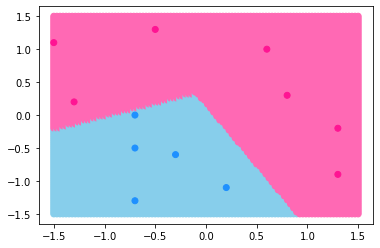

In [127]:
plt.scatter(d[:,0], d[:,1], c=colors)
plt.scatter(points.T[:, 0], points.T[:, 1], c=clrs)
plt.show()